In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime as dt

In [17]:
train = pd.read_csv('train.csv')

In [39]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [6]:
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

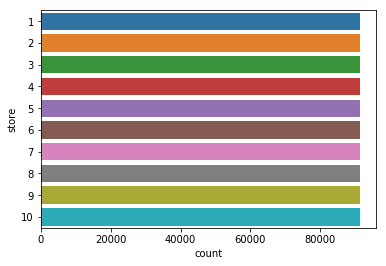

In [8]:
sns.countplot(y=train['store'])

In [9]:
train['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [10]:
c_m_tr = (train['item'].astype(str) + "_" + train['store'].astype(str)).unique()
print("there are ", len(c_m_tr), " store-item pairs in train data")

there are  500  store-item pairs in train data


In [11]:
train['item'].nunique()

50

In [12]:
train['store'].nunique()

10

In [13]:
train.groupby(['store','item'])['sales'].sum()

store  item
1      1        36468
       2        97050
       3        60638
       4        36440
       5        30335
       6        96889
       7        96383
       8       126856
       9        84918
       10      121163
       11      115436
       12      115465
       13      139067
       14       97050
       15      145497
       16       42605
       17       54729
       18      139407
       19       66972
       20       78318
       21       66058
       22      132899
       23       48334
       24      109560
       25      132816
       26       78949
       27       36613
       28      145289
       29      115196
       30       66317
                ...  
10     21       82595
       22      165310
       23       60441
       24      135704
       25      165244
       26       98088
       27       45105
       28      180347
       29      142862
       30       83150
       31      120423
       32       90101
       33      143094
       34       5260

In [14]:
x = train.groupby('store')['sales'].sum().reset_index()

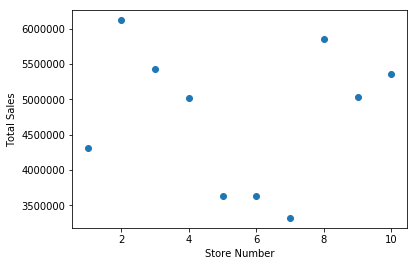

In [15]:
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.scatter(x['store'],x['sales'])
plt.show()

In [38]:
train['date'] = pd.to_datetime(train['date'])

In [44]:
train.groupby(by=['date','store'], as_index=False)['sales'].sum()

,date,store,sales
0,2013-01-01,1,1316
1,2013-01-01,2,1742
2,2013-01-01,3,1588
3,2013-01-01,4,1423
4,2013-01-01,5,1032
5,2013-01-01,6,1099
6,2013-01-01,7,964
7,2013-01-01,8,1628
8,2013-01-01,9,1383
9,2013-01-01,10,1521
